In [1]:
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import scipy
%matplotlib inline

Testing 2500 mean rev fbm stoch vol
===============

In [2]:
#for i in range(2500):
#    s[i][i]=em.gbm_expOUsoloVol(100,1,23400,seed=int(np.random.randn())*100).T
N=5000

In [3]:

seeds=np.zeros(N)#[int(np.random.randn()*100) ]
s=np.zeros((23400,N))
#for (i,j) in zip(range(23400),range(2500)):
#for i in range(23400):
for j in range(N):
    #a=np.random.seed(seed=j)
    seeds[j]=int(abs(np.random.randn()*10))
    s[:,j]=em.gbm_expOUsoloVol(100,1,23400,seed=j*10).T


In [5]:
r2=np.zeros((23400,N))
f=np.zeros((2339,N))
for i in range(N):    #23400
    r2[:,i]=em.calcolaRendimenti(s[:,i],23400).T
    f[:,i]=em.realVol(r2[:,i],10,23400)

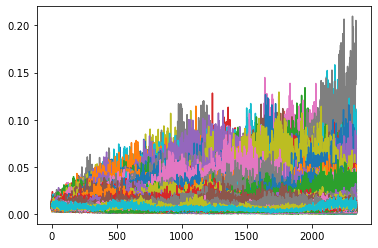

In [6]:
for i in range(N):
    plt.plot(f[:,i].T)
plt.show()

#r2=em.calcolaRendimenti(s[0],len(s[0]))
#f=em.realVol(r2,1,23400)

In [177]:
L=500
P=np.linspace(1,10,1000)
w=np.zeros((len(P),2500))
for (i,p) in zip(range(2500),range(len(P))):
    w[p]=np.linalg.norm(em.calcW(f[:,i],L,P[p]))**2
#H=[]
#for p in range(len(P)):
#    H.append(1/P[p])
#datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
#datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


In [226]:
L=500
P=np.linspace(1,20,100)
w=np.zeros((len(P),N))
H=[]
minu=np.zeros(N)
minimum=100000000000000
for i in range(N):
    for p in range(len(P)):
        w[p,i]=np.linalg.norm(em.calcW(f[:,i],L,P[p])-1)**2#x6[1]
#    if min(w[:,i])<minimum: 
#        minimum=min(w[:,i])
#        H.append(1/P[p])


In [166]:
eh=lambda a : 1/a 


In [227]:
datasigOU=pd.DataFrame(w,index=P)
a=datasigOU.idxmin(axis = 0)
h=eh(a)

#datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.02 sec] [RSS: 95.1282] [loc=0.230 scale=0.165]
[distfit] >[expon     ] [0.00 sec] [RSS: 48.227] [loc=0.050 scale=0.180]
[distfit] >[pareto    ] [0.24 sec] [RSS: 48.9931] [loc=-645544.371 scale=645544.421]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 88.3664] [loc=0.196 scale=0.130]
[distfit] >[t         ] [0.07 sec] [RSS: 89.8023] [loc=0.203 scale=0.128]
[distfit] >[genextreme] [0.23 sec] [RSS: 72.9307] [loc=0.142 scale=0.099]
[distfit] >[gamma     ] [0.14 sec] [RSS: 56.1684] [loc=0.050 scale=0.147]
[distfit] >[lognorm   ] [0.14 sec] [RSS: 66.3191] [loc=0.013 scale=0.160]
[distfit] >[beta      ] [0.25 sec] [RSS: 39.0893] [loc=0.050 scale=1.154]
[distfit] >[uniform   ] [0.00 sec] [RSS: 137.105] [loc=0.050 scale=0.789]
[distfit] >[loggamma  ] [0.10 sec] [RSS: 95.681] [loc=-54.278 scale=7.216]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=0.810342, b=4.43897, loc=0.05, scale=1.15381)'}, xlabel='Values', ylabel='Frequency'>)

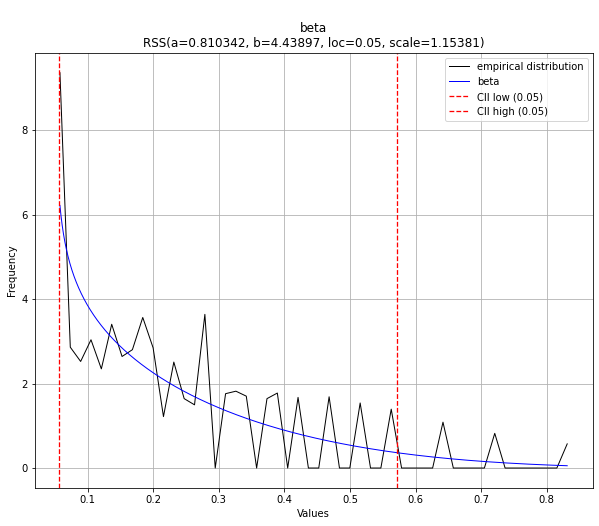

In [228]:
h=pd.Series(h[h<1])
s=pd.Series(h[h>0])
model= distfit(bound='both')
model.fit_transform(h)
model.plot() 

In [ ]:
w

In [178]:

for p in range(len(P)):
    H.append(1/P[p])


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

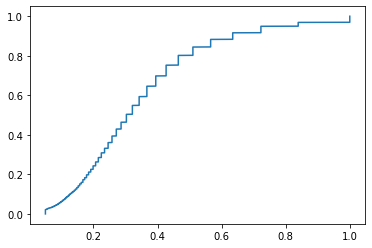

In [22]:
ecdf = ECDF(h)
plt.plot(ecdf.x,ecdf.y)
plt.show()

In [ ]:
%pip install distfit
from distfit import distfit

In [99]:
from distfit import distfit

In [189]:
acca=[]
for h in h:
    if h<0.9:
        acca.append(h)


TypeError: 'float' object is not iterable

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 36.4796] [loc=0.351 scale=0.209]
[distfit] >[expon     ] [0.00 sec] [RSS: 47.6888] [loc=0.050 scale=0.301]
[distfit] >[pareto    ] [0.34 sec] [RSS: 48.0356] [loc=-5196036.995 scale=5196037.045]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 31.474] [loc=0.313 scale=0.162]
[distfit] >[t         ] [0.06 sec] [RSS: 31.8623] [loc=0.318 scale=0.155]
[distfit] >[genextreme] [0.16 sec] [RSS: 29.3009] [loc=0.252 scale=0.149]
[distfit] >[gamma     ] [0.03 sec] [RSS: 29.835] [loc=0.016 scale=0.131]
[distfit] >[lognorm   ] [0.07 sec] [RSS: 29.4317] [loc=-0.089 scale=0.397]
[distfit] >[beta      ] [0.16 sec] [RSS: 30.0031] [loc=0.023 scale=5.600]
[distfit] >[uniform   ] [0.0 sec] [RSS: 59.8336] [loc=0.050 scale=0.950]
[distfit] >[loggamma  ] [0.10 sec] [RSS: 36.9422] [loc=-73.662 scale=9.737]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngenextreme\nRSS(c=-0.0828507, loc=0.252483, scale=0.148561)'}, xlabel='Values', ylabel='Frequency'>)

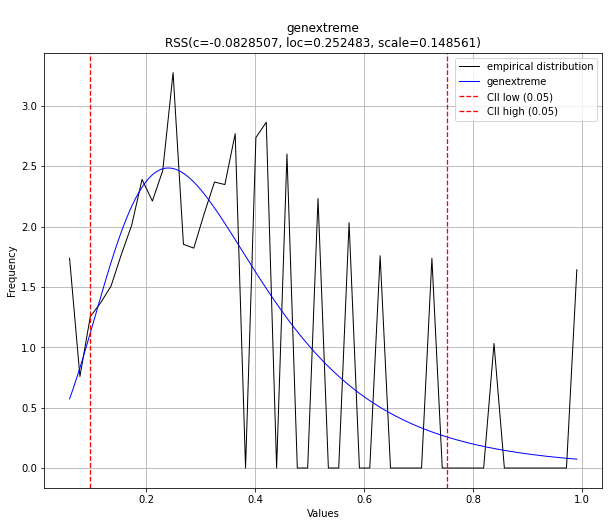

In [47]:
model= distfit(bound='both')
model.fit_transform(h)
model.plot() 


In [125]:
x=np.array(acca)

[distfit] >fit..
[distfit] >transform..
[distfit] >[t] [0.18 sec] [RSS: 213.628] [loc=0.357 scale=0.142]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\nRSS(df=5.68796e+06, loc=0.357192, scale=0.142156)'}, xlabel='Values', ylabel='Frequency'>)

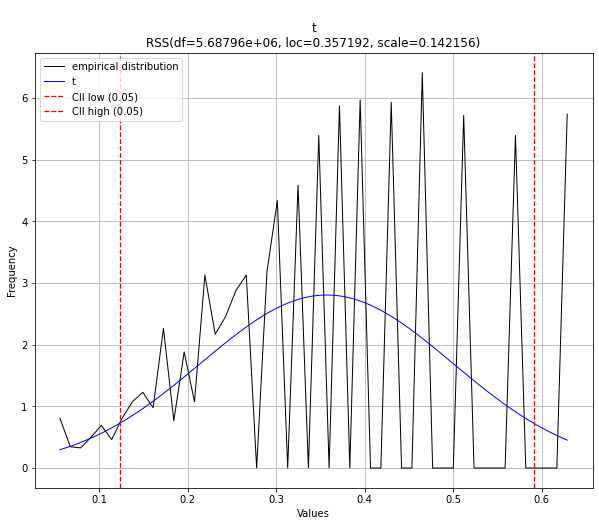

In [163]:
model= distfit(distr="t")
model.fit_transform(np.array(acca))
model.plot() 

In [30]:
from sklearn.neighbors import KernelDensity

In [171]:
HH=np.array(pd.Series.to_list(H))
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(HH.reshape(-1, 1))#h.reshape(1, -1)
kde.score_samples(HH.reshape(-1, 1))


AttributeError: 'list' object has no attribute '_values'

In [ ]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(HH.reshape(-1, 1))
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

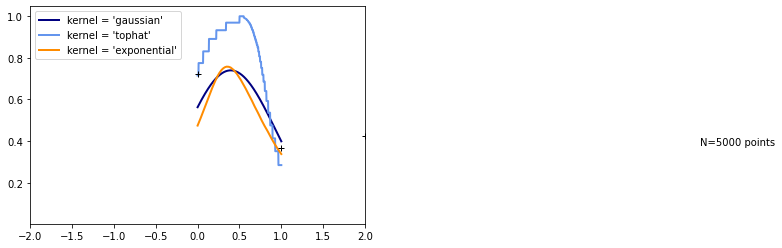

In [97]:
from scipy.stats import norm
X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]

#true_dens = HH.reshape(-1, 1)#0.3 * norm(0, 1).pdf(X_plot[:, 0])# + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
#ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "exponential"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(HH.reshape(-1, 1))
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )
ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(HH.reshape(-1, 1)[:, 0], "+k")

ax.set_xlim(-2, 2)
#ax.set_ylim(-0.02, 0.4)
plt.show()

In [161]:
acca=[]
for h in HH:
    if h<0.7:
        acca.append(h)
np.std(acca)

0.14215643337993483

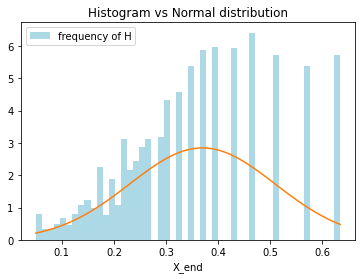

In [176]:
#x = np.linspace(X_end.min(), X_end.max(), 100)
#pdf_fitted = ss.norm.pdf(x, *param)
#
#plt.plot(x, pdf_fitted, color='r', label="Normal")
mu, sigma = scipy.stats.norm.fit(acca)#h[:-1])
#a=scipy.stats.chi2.fit(h)


_, bins, _=plt.hist(acca, density=True, bins=50, facecolor="LightBlue", label="frequency of H")
best_fit_line = scipy.stats.t.pdf(bins,df=5000,loc=0.37, scale=0.14)#bins, mu, sigma)
plt.legend(); plt.title("Histogram vs Normal distribution"); plt.xlabel("X_end")
plt.plot(bins, best_fit_line)
plt.show()

In [ ]:
#sigToAppend=pd.DataFrame[w]
#np.linalg.norm(em.calcW(f[:,2000],L,P[p])-1)**2
#datasigOU=pd.concat([sigToAppend], axis=1)#
#datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

7.702508500618569e+43

c:\Users\macri\anaconda3\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


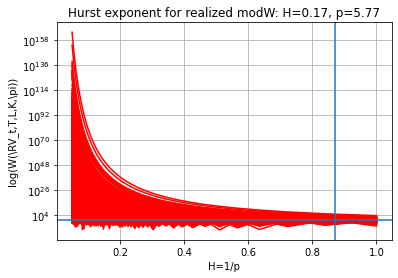

In [29]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\RV_t,T,L,K,\pi))')
plt.title('Hurst exponent for realized modW: H=0.17, p=5.77')
plt.axvline(x=1/1.15	, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.grid(True)
plt.show()